# Reinforcement Learning for trading

Using Open AI gym & Stable Baselines<br>
Source:https://www.youtube.com/watch?v=D9sU1hLT0QY&ab_channel=NicholasRenotte  

In [37]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

## Get the data

In [38]:
# Read the file in from device
df = pd.read_csv('BTC_INR.csv')

In [39]:
# Change the index to the date
df = df.set_index(pd.DatetimeIndex(df['Date'].values)) 
df.index.name = 'Date'
df.drop(columns=['Date'], inplace=True)
df.drop(columns=['Adj Close'], inplace=True)

In [40]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-10-24,531125.5625,534905.8750,528807.6250,532109.6250,1.155234e+12
2019-10-25,531911.8125,615708.6875,529882.0625,613524.0625,2.033467e+12
2019-10-26,614011.1875,709940.3750,613660.1875,654913.8125,3.152115e+12
2019-10-27,654682.5000,690656.6250,645532.4375,676643.4375,2.308897e+12
2019-10-28,677591.8125,693664.0625,654827.1250,654827.1250,2.189437e+12


In [41]:
# Check of null values in the data
filt = df['Open'].isnull()
df[filt]

,Open,High,Low,Close,Volume
Date,,,,,
2020-08-04,NaN,NaN,NaN,NaN,NaN


In [42]:
# There is 1 day of missing values. Using linear interpolate to fill that value
df = df.interpolate()

## Visalise data

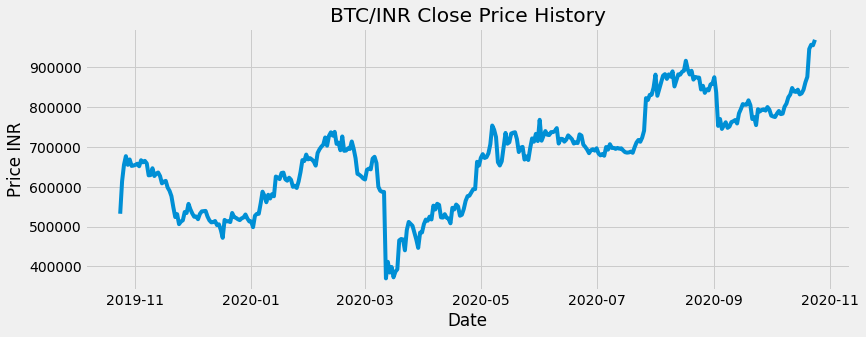

In [43]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label='Close')
plt.title('BTC/INR Close Price History')
plt.xlabel('Date')
plt.ylabel('Price INR')
plt.show()

## Build environment

In [51]:
# frame_bound -> start and end of the dataframe - first parameter = window_size
# window size determines how many previous time steps the model will use as reference data to make the next trade 
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)

Build an environment and test with random sample of the action space 

In [52]:
env.action_space

Discrete(2)

info {'total_reward': -11337.09375, 'total_profit': 0.6333473340346775, 'position': 0}


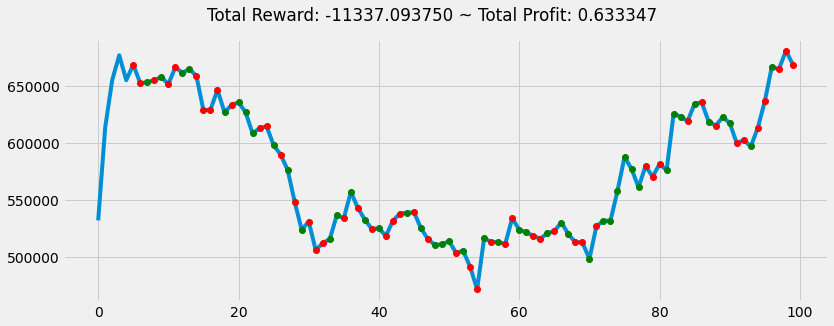

In [53]:
state = env.reset()
while True:
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done:
        print("info", info)
        break

plt.figure(figsize=(12.2, 4.5))
plt.cla()
env.render_all()
plt.show()

## Adding custom indicators

In [54]:
import ta

In [55]:
macd_indicator = ta.trend.MACD(df['Close'], n_slow = 26, n_fast = 12, n_sign = 9, fillna = False )
df['MACD'] = macd_indicator.macd()
df['Diff'] = macd_indicator.macd_diff()
df['Signal'] = macd_indicator.macd_signal()

In [71]:
rsi_indicator = ta.momentum.RSIIndicator(df['Close'], 14, fillna= False)
df['RSI'] = rsi_indicator.rsi()

In [72]:
aroon_indicator = ta.trend.AroonIndicator(close=df['Close'], n=25, fillna=False)
df['Aroon_Up'] = aroon_indicator.aroon_up()
df['Aroon_Down'] = aroon_indicator.aroon_down()
df['Aroon_Indicator'] = aroon_indicator.aroon_indicator()

In [88]:
df.head()

,Open,High,Low,Close,Volume,MACD,Diff,Signal,RSI,Aroon_Up,Aroon_Down,Aroon_Indicator
Date,,,,,,,,,,,,
2019-10-24,531125.5625,534905.8750,528807.6250,532109.6250,1.155234e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-25,531911.8125,615708.6875,529882.0625,613524.0625,2.033467e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-26,614011.1875,709940.3750,613660.1875,654913.8125,3.152115e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-27,654682.5000,690656.6250,645532.4375,676643.4375,2.308897e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-28,677591.8125,693664.0625,654827.1250,654827.1250,2.189437e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
# Get the dataframe from after the indicators
new_df = df.loc['2019-11-26':][:]
new_df.shape

(334, 12)

(367, 12)